In [1]:
## Import Python libraries
import time
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import random
## Import Pytorch related libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset

# I. Tensor basics

## 1. Initializing a Tensor

In [2]:
## Initializing from Numpy array
np_arr = np.random.uniform(size=(5,5))
tensor1 = torch.from_numpy(np_arr.astype(np.float32))
print("\"tensor1\": {:}\n".format(tensor1))
## Convert back to Numpy
np_tensor1 = tensor1.numpy()

## Initializing from random
tensor2 = torch.rand(5,5)
print("\"tensor2\": {:}\n".format(tensor2))

## Initializing with constant values
tensor3 = 5.0 * torch.ones(5,5)
print("\"tensor3\": {:}\n".format(tensor3))
tensor4 = torch.full((5,5), 5.0)
print("\"tensor4\": {:}\n".format(tensor4))

## Sending to GPU
tensor2_cuda = tensor2.cuda()
print("\"tensor2_cuda\": {:}\n".format(tensor2_cuda))
## Sending to GPU with safeguard 
my_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor2_dev = tensor2.to(my_device)

## Sending to CPU
tensor2_cpu = tensor2_cuda.cpu()

"tensor1": tensor([[0.4678, 0.8603, 0.2572, 0.5054, 0.2228],
        [0.0889, 0.0431, 0.1098, 0.7675, 0.0646],
        [0.3083, 0.6003, 0.4861, 0.3560, 0.9173],
        [0.5573, 0.5953, 0.9205, 0.7592, 0.9476],
        [0.5946, 0.8965, 0.7212, 0.5258, 0.9119]])

"tensor2": tensor([[0.3945, 0.1720, 0.6747, 0.6665, 0.7510],
        [0.8047, 0.4598, 0.9989, 0.2711, 0.0290],
        [0.0880, 0.4179, 0.6752, 0.6441, 0.1545],
        [0.6596, 0.6966, 0.7135, 0.6813, 0.5257],
        [0.4809, 0.6697, 0.3884, 0.8901, 0.8344]])

"tensor3": tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])

"tensor4": tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])

"tensor2_cuda": tensor([[0.3945, 0.1720, 0.6747, 0.6665, 0.7510],
        [0.8047, 0.4598, 0.9989, 0.2711, 0.0290],
        [0.0880, 0.4179, 0.6752,

## 2. Indexing and Slicing Tensor

In [3]:
## Determine the dimension of Tensor
print("Dimension of \"tensor1\": {:}".format(tensor1.size()))
print("First dimension of \"tensor1\": {:}\n".format(tensor1.size(0)))

## Obtain single value
print("Obtain single value in one-element tensor: ", tensor1[0,3])
print("Obtain single value in numerical value: ", tensor1[0,3].item(), "\n")

## Obtain values using array of indices 
## e.g., value at var_arr[0,1] and var_arr[4,3]
print("Obtain values with array of indices: ", tensor1[[0,4],[1,3]], "\n")

## Obtain values with Boolean array
print("Obtain values with Boolean array: ", tensor1[tensor1 > 0.5], "\n")

## Slice N-d
slice_ten1 = tensor1[:,2:4]
print("Slicing in multi-dimension: \nShape of \"slice_ten1\": {:}".format(slice_ten1.size()))

slice_ten2 = tensor1[:,1:2]
print("Shape of \"slice_ten2\": {:}\n".format(slice_ten2.size()))

# Slicing 1-d
slice_ten3 = tensor1[:,1]
print("Slicing in multi-dimension:\nShape of \"slice_ten3\": {:}\n".format(slice_ten3.size()))

Dimension of "tensor1": torch.Size([5, 5])
First dimension of "tensor1": 5

Obtain single value in one-element tensor:  tensor(0.5054)
Obtain single value in numerical value:  0.5053775310516357 

Obtain values with array of indices:  tensor([0.8603, 0.5258]) 

Obtain values with Boolean array:  tensor([0.8603, 0.5054, 0.7675, 0.6003, 0.9173, 0.5573, 0.5953, 0.9205, 0.7592,
        0.9476, 0.5946, 0.8965, 0.7212, 0.5258, 0.9119]) 

Slicing in multi-dimension: 
Shape of "slice_ten1": torch.Size([5, 2])
Shape of "slice_ten2": torch.Size([5, 1])

Slicing in multi-dimension:
Shape of "slice_ten3": torch.Size([5])



## 3. Operations

In [4]:
## Create a few tensor and send them to GPU
tensor1 = torch.arange(6,dtype=torch.float).reshape(3,2).cuda()
tensor2 = torch.rand(2,2).cuda()
tensor3 = torch.arange(4,dtype=torch.float).reshape(2,2).cuda()

## Matrices Operations
elementwise_add = tensor2 + tensor3
elementwise_sub = tensor2 - tensor3
elementwise_mul1 = tensor2 * tensor3
elementwise_mul2 = torch.multiply(tensor2, tensor3)

matmul1 = tensor1 @ tensor2
matmul2 = torch.matmul(tensor1, tensor2)

## Common functions
print("\"tensor1\":\n{:}".format(tensor1))
tensor1_mean = torch.mean(tensor1)
print("Mean across all dimensions:{:}".format(tensor1_mean.item()))
tensor1_mean2 = torch.mean(tensor1, dim=1)
print("Mean across second dimension:{:}".format(tensor1_mean2))

"tensor1":
tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], device='cuda:0')
Mean across all dimensions:2.5
Mean across second dimension:tensor([0.5000, 2.5000, 4.5000], device='cuda:0')


# II. Set-up Deep Learning Framework
## 1. Dataset Class & Dataloader
### A. Dataset Class

The Dataset class in PyTorch is used to define data loading and transformations. For a custom dataset, you have to inherit from the Dataset class to define how to load and preprocess your data. More details can be found here: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset. An example below illustrates how a desired dataset is contructed. For this example, we create a Dataset class for a dataset contaning images of ants and bees. First, you need to download the dataset using this link (https://download.pytorch.org/tutorial/hymenoptera_data.zip). Then, unzip and put them in the same directory as this notebook.

In [5]:
##### Get file names #####
## This function reads the file names in train and test sets. If it's a train set, split 90/10 into train/val
def get_files(rdir, datatype):    
    
    files = []
    for x in ['ants','bees']:
        curr_files = glob.glob(rdir + '/' + x + '/*')
        files.append(curr_files)        
        
    if datatype == 'test':        
        test_files = files[0] + files[1]
        random.shuffle(test_files)
        return test_files
    
    else:
        train_files = []; val_files = []
        for x in files:
            ## Split into train/val
            random.shuffle(x)            
            curr_train_files = x[:int(0.9*len(x))]
            curr_val_files = x[int(0.9*len(x)):]                 
            assert(len(curr_train_files)+len(curr_val_files) == len(x))
            
            train_files += curr_train_files
            val_files += curr_val_files
        random.shuffle(train_files); random.shuffle(val_files)
        return train_files, val_files
        
##### Create dataset class #####
class MyDataset(Dataset):
    ##### Initialize the class #####
    def __init__(self, files, datatype):
        ## Initialize the files, datatype, and labels
        self.img_files = files
        self.datatype = datatype               
        self.labels = ['ants','bees']
        
        
        ## Define data augmentation transformations for the input images. In this exercise, we use the following
        ## transformations for training set: resizing to 224x224 (to be similar as ImageNet dataset), 
        ## random vertical and horizontal flipping
        ## converting to tensor, normalizing per channel (i.e., R, G, and B) 
        ## with the average and standard deviation of images in the ImageNet dataset.
        ## Meanwhile, the transformations for validation set and test set are:
        ## resizing to 224x224, converting to tensor, normalizing per channel (i.e., R, G, and B) 
        ## with the average and standard deviation of images in the ImageNet dataset.
        if datatype == 'train':
            self.set_of_transforms = transforms.Compose([
                                             transforms.RandomResizedCrop(224), 
                                             transforms.RandomVerticalFlip(),
                                             transforms.RandomHorizontalFlip(),
                                             transforms.ToTensor(),        
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])
        else:
            self.set_of_transforms = transforms.Compose(
                                        [transforms.Resize((224,224)), transforms.ToTensor(),        
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])])
        
    ##### Retrieve a sample with the corresponding index #####
    ## This function retrieve a sample from the dataset at the specified index 
    ## and returns an image and the corresponding label stored in Pytorch tensors     
    def __getitem__(self, i):
        ## Load an image as PIL object and perform transformation
        curr_pil_image = Image.open(self.img_files[i]).convert('RGB')  
        
        image_to_return = self.set_of_transforms(curr_pil_image)
        
        ## Get the corresponding label        
        curr_label = self.labels.index( self.img_files[i].split('/')[-2] )
                
        return image_to_return, curr_label
    
    ##### Get the length of the dataset #####
    def __len__(self):
        return len(self.img_files)

In [6]:
## Get necessary files
train_files, val_files = get_files('./hymenoptera_data/train','train')
test_files = get_files('./hymenoptera_data/val', 'test')

## Load files into a custom dataset class
train_dataset = MyDataset(train_files, 'train')
val_dataset = MyDataset(val_files, 'val')
test_dataset = MyDataset(test_files, 'test')

## Visualize some samples
curr_img1, curr_label1 = test_dataset[10]; curr_img1 = curr_img1.numpy().transpose(1,2,0)
curr_img2, curr_label2 = test_dataset[20]; curr_img2 = curr_img2.numpy().transpose(1,2,0)
## Shift the image color space back to RGB
mu = np.array([[[0.485, 0.456, 0.406]]]); std = np.array([[[0.229, 0.224, 0.225]]])
curr_img1 = curr_img1*std+mu; curr_img2 = curr_img2*std+mu

fg, ax = plt.subplots(1,2)
ax[0].imshow(curr_img1); ax[0].set_title(test_dataset.labels[curr_label1])
ax[1].imshow(curr_img2); ax[1].set_title(test_dataset.labels[curr_label2])
[axi.axis('off') for axi in ax]
plt.tight_layout()

IndexError: list index out of range

### B. DataLoader

The DataLoader class handles how the dataset is sampled. The main functionalities are shuffling dataset, loading data with a specified batch size, and the parallel loading.

In [7]:
## Load dataset class into Dataloader 
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle = True, batch_size = 32, num_workers = 8)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = 32, num_workers = 8)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, num_workers = 8)

## 2. Build a Model

Torch NN class inside Pytorch library provides basic layers for building a deep learning model. The provided layers contains many important layers used in modern deep learning architectures: Linear, MaxPool2d, AvgPool2d, Conv2d, Dropout2d, BatchNorm2d, etc. Besides, Pytorch provides pretrained popular deep learning models. In this section, we will exemplify three different ways to build a deep learning model.

### A. Build a Model with Sequential Module

The Sequential module encompasses a set of layers in which they will be executed sequentially. This is the simplest and fastest way to build a model.

In [8]:
model_seq = torch.nn.Sequential(
                nn.Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)), nn. ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2),
                nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)), nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2),
                nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), nn.ReLU(inplace=True),
                nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), nn.ReLU(inplace=True),
                nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), nn.ReLU(inplace=True),  
                nn.AdaptiveAvgPool2d(output_size=(6, 6)),  
                nn.Flatten(),
                nn.Dropout(p=0.5, inplace=False), 
                nn.Linear(in_features=9216, out_features=4096, bias=True), nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(in_features=4096, out_features=256, bias=True), nn.ReLU(inplace=True),    
                nn.Linear(in_features=256, out_features=2, bias=True)
                )

model_seq = model_seq.cuda()

### B. Build a Model with Module Class

You can also inherit from the Module class to create a model. Using this approach, you need to define two functions: ``__init__``, and ``forward``. You first define your model inside ``__init__`` using layers provided in Torch NN class or your own custom layers. Next, you declare a forward function, which defines the feed-forward process using the specified layers in ``__init__``. The backward pass is automatically inferred by PyTorch; thus, you don't need to specify.

In [9]:
class ConvNet(torch.nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv_layers = nn.Sequential(
                nn.Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)), nn. ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2),
                nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)), nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2),
                nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), nn.ReLU(inplace=True),
                nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), nn.ReLU(inplace=True),
                nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), nn.ReLU(inplace=True),  
                nn.AdaptiveAvgPool2d(output_size=(6, 6)),  
                nn.Flatten() 
                )
        self.classifier = nn.Sequential(
                nn.Dropout(p=0.5, inplace=False), 
                nn.Linear(in_features=9216, out_features=4096, bias=True), nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(in_features=4096, out_features=256, bias=True), nn.ReLU(inplace=True),    
                nn.Linear(in_features=256, out_features=2, bias=True)
                )

    def forward(self, x):
        ftrs = self.conv_layers(x)
        out = self.classifier(ftrs)
        return out
      
model_class = ConvNet()
model_class = model_class.cuda()

### C. Build a Model from a Pretrained Model 

PyTorch offers a few popular models with optional pretrained weights on ImageNet dataset (https://pytorch.org/docs/stable/torchvision/models.html)

In [10]:
class ConvNet2(torch.nn.Module):
    def __init__(self):
        super(ConvNet2, self).__init__()
        
        self.model = torchvision.models.resnet18(pretrained = True)
        num_ftrs = self.model.fc.in_features
        self.model.fc = torch.nn.Linear(in_features = num_ftrs, out_features = 2)
        
    def forward(self, x):
        out = self.model(x)
        return out
    
model_pretrained = ConvNet2()
model_pretrained = model_pretrained.cuda()

## 3. Loss Function

PyTorch offers several different loss functions. You need to be careful about what type of input, i.e., logits or probabilities, your specified loss function takes as input. It is preferable to use the loss functions that receive logits instead of probabilities because they are numerically more stable. For this example, we will use cross entropy loss.

In [11]:
criterion = torch.nn.CrossEntropyLoss()

## 4. Optimizer

PyTorch has several different kinds of optimizers. Each optimizer instance optimizes a set of specified weights. In this example, we will use the stochastic gradient descent optimizer.

In [12]:
## Using a single learning rate for the entire model
optimizer1 = optim.SGD(model_pretrained.parameters(), lr=0.001, momentum=0.9)

## Using different learning rate for different parts of the model
params1_updates = []
params2_updates = []
for name, param in model_pretrained.named_parameters():  
    if 'fc' in name in name:                
        params2_updates.append(param)
    else:                
        params1_updates.append(param) 

optimizer2 = torch.optim.SGD([{'params':params1_updates, 'lr':0.0001},
                                {'params':params2_updates, 'lr':0.001}
                                ], momentum=0.9)

## 5. Training a Model

The training process in Pytorch requires the following steps:

    1) Loops - We will have two loops, one for epochs and one for batches.

    2) Model mode - Toggle to train mode.

    3) zero_grad() - PyTorch accumulates gradients by default. Hence, we need to erase the gradients from previous batch before we start computing gradients for this current batch. Unless in some rare instances, we want to compute the accumulated gradients of multiple batches; then, this call can be exempted untill needed.
    
    4) Execute the model 
    
    5) Compute the loss
    
    6) Compute gradients - Call the backward() function for the loss to compute the gradients.

    7) Update parameters - Call the step() function to update the specified parameters in the optimizer based on the gradients computed from step 7.

    8) Monitor the progress - Use a few metrics to evaluate the model's performance during training to make sure that the model is converging appropriately. The evaluatation can be done at every epoch or more frequent if needed to. The typical metrics are: training loss, validation loss, training accuracy, etc.

    9) Save the best model - Store the model's parameters with deepcopy and/or torch.save() functions, when the model achieves the best performance under a selected metric, for later use.

In [13]:
def eval_model(dataloader, model):
    ## Toggle model to eval mode
    model.eval()
            
    with torch.no_grad():
        #run through several batches, does inference for each and store inference results
        # and store both target labels and inferenced scores
        acc = 0.0
        for imgs, labels in dataloader:
            imgs = imgs.cuda(); labels = labels.cuda()
            outputs = model(imgs)
            preds = torch.argmax(outputs,1)
            
            acc += torch.count_nonzero(preds == labels)
            
        return acc/len(dataloader.dataset)

Ep 0: Train Loss = 0.65804; Train Acc = 0.74886
Val Acc = 0.73077
Ep 1: Train Loss = 0.49938; Train Acc = 0.91781
Val Acc = 0.92308
Ep 2: Train Loss = 0.34993; Train Acc = 0.93607
Val Acc = 0.96154
Ep 3: Train Loss = 0.26187; Train Acc = 0.93607
Val Acc = 0.96154
Ep 4: Train Loss = 0.25802; Train Acc = 0.93607
Val Acc = 0.96154
Ep 5: Train Loss = 0.18138; Train Acc = 0.93607
Val Acc = 0.96154
Ep 6: Train Loss = 0.19736; Train Acc = 0.95434
Val Acc = 1.00000
Ep 7: Train Loss = 0.16006; Train Acc = 0.94977
Val Acc = 0.96154
Ep 8: Train Loss = 0.15461; Train Acc = 0.96347
Val Acc = 0.96154
Ep 9: Train Loss = 0.11335; Train Acc = 0.96347
Val Acc = 1.00000
Ep 10: Train Loss = 0.10987; Train Acc = 0.96347
Val Acc = 0.96154
Ep 11: Train Loss = 0.13984; Train Acc = 0.95434
Val Acc = 0.96154
Ep 12: Train Loss = 0.10284; Train Acc = 0.96347
Val Acc = 1.00000
Ep 13: Train Loss = 0.09841; Train Acc = 0.97717
Val Acc = 1.00000
Ep 14: Train Loss = 0.10603; Train Acc = 0.98174
Val Acc = 0.96154
Ep 15

Text(0.5, 1.0, 'Training Loss')

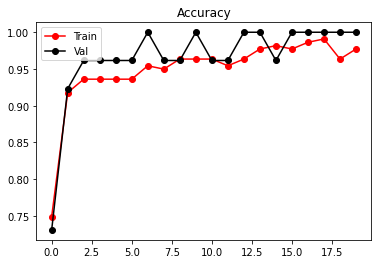

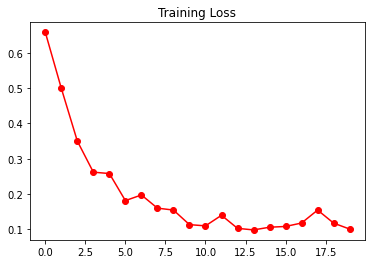

In [14]:
train_loss_list = []
train_acc_list = []; val_acc_list = []
best_acc = 1e-9

num_epochs = 20


## Loop through number of epochs
for ep in range(num_epochs):    
    running_loss = 0.0
    ## Put model on train mode
    model_pretrained.train()
    ## Loop through batches of samples
    for imgs, labels in train_loader:
        ## Zero the gradients
        optimizer1.zero_grad()
        
        ## Send input and label to GPU
        with torch.set_grad_enabled(True):
            imgs = imgs.cuda(); labels = labels.cuda()            
            outputs = model_pretrained(imgs)

            ## Compute the loss
            loss = criterion(outputs, labels)

            ## Perform backward pass
            loss.backward()

            ## Update parameters
            optimizer1.step()
        running_loss += (loss.item()*imgs.size(0))
        
    curr_ep_loss = running_loss / len(train_loader.dataset)    
    ## Evaluate the current stage of the model on training set and validation set
    curr_train_acc = eval_model(train_loader, model_pretrained)
    curr_val_acc = eval_model(val_loader, model_pretrained)
    print('Ep {:d}: Train Loss = {:.5f}; Train Acc = {:.5f}'.format(ep,curr_ep_loss,curr_train_acc))
    print('Val Acc = {:.5f}'.format(curr_val_acc))
    train_loss_list.append(curr_ep_loss)
    train_acc_list.append(curr_train_acc); val_acc_list.append(curr_val_acc)
    
    ## Save the model 
    if curr_val_acc > best_acc:
        best_acc = curr_val_acc
        best_model_pretrained = copy.deepcopy(model_pretrained.state_dict())
        torch.save(best_model_pretrained, './best_model_pretrained.pt')

## Plot training statistics 
plt.figure()
plt.plot(train_acc_list,'ro-',val_acc_list,'ko-')
plt.legend(['Train','Val'])
plt.title('Accuracy')

plt.figure()
plt.plot(train_loss_list,'ro-')
plt.title('Training Loss')

## 6. Evaluating model

The inference stage has a similar structure as the training process excepts the gradients computation and parameters update. See ``eval_model`` above for more details. Here, we are using that function to evaluate the test set.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy of Test Set = 0.92810


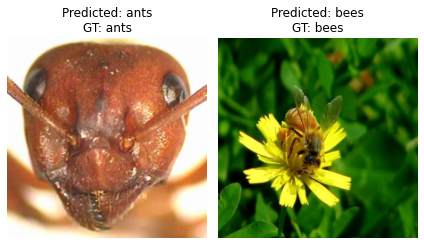

In [15]:
## Load the best parameters
model_pretrained.load_state_dict(best_model_pretrained)
## Load the weights from a binary file
#load_state_dict(torch.load('./best_model_pretrained.pt'))

test_acc = eval_model(test_loader, model_pretrained)
print('Accuracy of Test Set = {:.5f}'.format(test_acc))

## Visualize some examples
curr_inp1, curr_label1 = test_dataset[10]
curr_inp2, curr_label2 = test_dataset[110]
## Predict a given input
curr_out1 = model_pretrained(curr_inp1.cuda().unsqueeze(0))
curr_pred1 = torch.argmax(curr_out1,1)
curr_out2 = model_pretrained(curr_inp2.cuda().unsqueeze(0))
curr_pred2 = torch.argmax(curr_out2,1)

## Shift the image color space back to RGB
curr_img1 = curr_inp1.numpy().transpose(1,2,0); curr_img2 = curr_inp2.numpy().transpose(1,2,0)
mu = np.array([[[0.485, 0.456, 0.406]]]); std = np.array([[[0.229, 0.224, 0.225]]])
curr_img1 = curr_img1*std+mu; curr_img2 = curr_img2*std+mu


fg, ax = plt.subplots(1,2)
ax[0].imshow(curr_img1)
ax[0].set_title('Predicted: %s\nGT: %s' %(test_dataset.labels[curr_pred1],test_dataset.labels[curr_label1]))
ax[1].imshow(curr_img2)
ax[1].set_title('Predicted: %s\nGT: %s' %(test_dataset.labels[curr_pred2],test_dataset.labels[curr_label2]))
[axi.axis('off') for axi in ax]
plt.tight_layout()